# __The Maximum Subarray Problem__



## How it works:

The maximum subarray problem is algorithm that use divide and conquer tehnique (just as merge sort algorithm). We need continous subarray that has the largest increase and because of that array must contain positive and negative numbers. If there is only negative numbers algorithm is going to return one element (the smallest negative number) and if the array containes only positive numbers is going to return sum of all elements.

Algorithm approach problem by dividing array into two subarrays of as equal size as posibble. Algorithm doing this recursively until there is one element in subarray.

When there is one element in subarray algorithm return value of that subarray. When this is done for left and right element it is time to find sum of subarray that containes those values. After algorithm has sums of left, and right side of subarray and sum of crossing subarray function return maximum sum of those three. Returnig these values when algorithm merge two subarrays it has left and right sum and only need to calculate crossing sum and again return maximux sum of three. Algorithm do this until all subarrays are not merge into original array. When last two subarrays are merge into original array algorithm have maximum left and right sum and now only need to calculate crossing sum and return maximum sum of subarray with indexes of starting and ending element that sum containe.


### E.g.

Array [9, -3, 5, -4, -6, 3, -2, 7]

Algorithm breaks one problem into two subarrays and it is doing breaking recursively until there is one element left into subarray. Then it returns value and position of element. When algorithm do that for two elements then there is a subarray of two element with sum of left and right side. Now algorithm calculate cross sum. When algorithm have sums of left and right side and sum from crossing the midpoint it compares those sums and return max sum with indices of starting and ending point of that sum. Algorithm now needs to back from every recursive call it made and in the same time return max sum with corresponding indices until it finally goes back from point where the function was first time called.

Values in {}: {maximum sum in left side, maximum sum in right side, maximum sum from crossing the midpoint}

Values in return statement (): (starting index of max sum, ending index of max sum, max sum) 

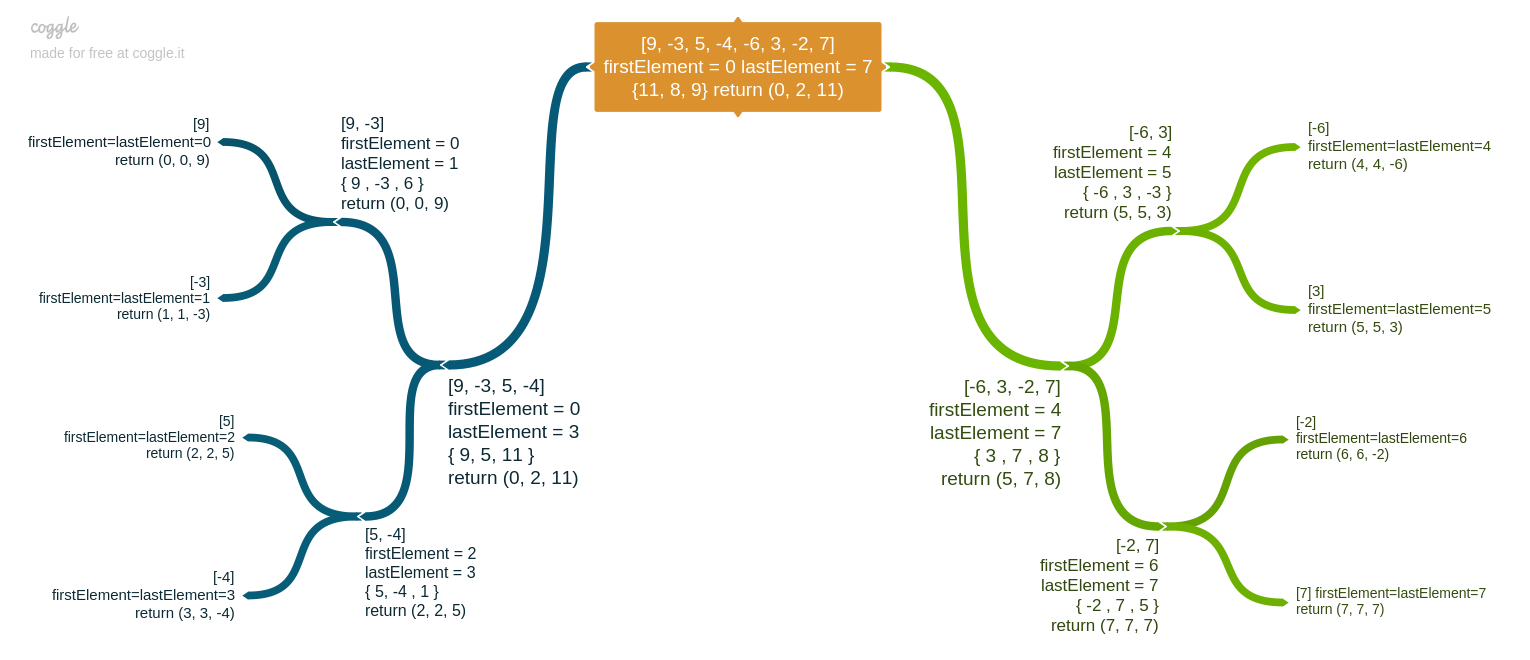




## Pseudocode:

        FIND-MAX-CROSSING-SUBARRAY(A, low, mid, high)
            left-sum = -∞
            sum = 0
            for (i = mid down to low)
                sum = sum + A[i]
                if (sum > left-sum)
                    left-sum = sum
                    max-left = i
                    
            right-sum = -∞
            sum = 0
            for (j = mid + 1 to high)
                sum = sum + A[j]
                if (sum > right-sum)
                    right-sum = sum
                    max-right = j
                    
            return (max-left, max-right, left-sum + right-sum)
            
        FIND-MAXIMUM-SUBARRAY(A, low, high)
            if (high == low)
                return(low, high, A[low])
            else
                    (left-low, left-high, left-sum) = FIND-MAXIMUM SUBARRAY(A, low, mid)
                    (right-low, right-high, right-sum) = FIND-MAXIMUM SUBARRAY(A, mid + 1, high)
                    (cross-low, cross-high, cross-sum) = FIND-MAX-CROSSING-SUBARRAY(A, low, mid, high)
                    
             if (left-sum >= right-sum and left-sum >= cross-sum)
                 return (left-low, left-heigh, left-sum)
             elseif (right-sum >= left-sum and right-sum >= cross-sum)
                 return (right-low, right-heigh, right-sum)
             else
                 return (cross-low, cross-heigh, cross-sum)


## Worst case running time T(n):

$$
T(n) = \theta(n{\log_2 n})
$$


## Use cases:

When you want to find continous subarray of numbers within a one-dimensional array with maximum sum (you got list of incomes and want to find a period when you had the biggest increace of incomes).
Mostly you are going to use for data analysis in verious fields such as genomic sequence analysis, computer vision, and data mining.

In [1]:
import sys

In [2]:
def findMaxCrossingSubarray(array, firtElement, middleElement, lastElement):
    
    leftSum = -sys.maxsize - 1
    rightSum = -sys.maxsize - 1
    currentSum = 0
    maxLeft = -1
    maxRight = -1
    
    for i in range(middleElement, firtElement - 1, -1):
        currentSum += array[i]
        if(currentSum > leftSum):
            leftSum = currentSum
            maxLeft = i
    
    currentSum = 0
    
    for j in range(middleElement + 1, lastElement + 1, 1):
        currentSum += array[j]
        if(currentSum > rightSum):
            rightSum = currentSum
            maxRight = j
    
    return (maxLeft, maxRight, leftSum + rightSum)

In [3]:
def findMaximumSubarray(array, firstElement, lastElement):
    
    if(firstElement == lastElement):
        return (firstElement, lastElement, array[firstElement])
    
    else:
        middleElement = (firstElement + lastElement) // 2
        
        leftLow, leftHigh, leftSum = findMaximumSubarray(array, firstElement, middleElement)
        
        rightLow, rightHigh, rightSum = findMaximumSubarray(array, middleElement + 1, lastElement)
        
        crossLow, crossHigh, crossSum = findMaxCrossingSubarray(array, firstElement, middleElement, lastElement)
        
    if(leftSum >= rightSum and leftSum >= crossSum):
        return(leftLow, leftHigh, leftSum)
    elif(rightSum >= leftSum and rightSum >= crossSum):
        return(rightLow, rightHigh, rightSum)
    else:
        return(crossLow, crossHigh, crossSum)

In [4]:
test = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]

firstElem = 0
lastElem = len(test) - 1

firstIndex, lastIndex, summ = findMaximumSubarray(test, firstElem, lastElem)

print('Start position: ' + str(firstIndex))
print('Final position: ' + str(lastIndex))
print('Maximum sum is: ' + str(summ))

Start position: 7
Final position: 10
Maximum sum is: 43
